# COARE Bulk Flux Algorithm

This notebook uses the COARE bulk flux algorithm to compute various surface fluxes and associated variables.  The code is based on python programs from Antoine Grouazel at Ifremer.  The programs were downloaded from http://www.ifremer.fr/cerweb/docs/cerform/api/cerform.flux.html.  These include two main programs, coare3.py and coare4.py, plus a set of utilities to compute various needed parameters (humidity, vapor pressure, _etc._).

The two programs are functions in the directory "coare" and the utilities are in "coare/utils".  The utilities include:

- air_humidity_method_bentamy.py.............compute saturation specific humidity (g/kg) from air temperature and relative humidity
- air_humidity_method_qsat26air.py............compute saturation specific humidity (g/kg) from air temperature, pressure and relative humidity
- get_velocity_roughness_length.py............compute velocity roughness length (m) from velocity drag coeeficient, including gustiness
- grv.py.........................................................compute gravity constant from latitude and (optionally) longitude
- relative_humidity_method_bentamy.py.....compute relative humidity from air temperature and specific humidity
- relative_humidity_method_fairall.py..........compute relative humidity from air temperature, pressure  and specific humidity
- sea_humidity_method_bentamy.py...........compute sea surface saturation specific humidity from SST
- sea_humidity_method_qsat26sea.py........compute sea surface saturation specific humidity from SST and air pressure
- sea_humidity_method_qsee.py................compute sea surface saturation specific humidity from SST and air pressure
- temperature_structure_method_psit_26.py....compute temperature structure (psi) from Monin-Obukhov stability parameter
- temperature_structure_method_psit_30.py....compute temperature structure (psi) from Monin-Obukhov stability parameter
- vapor_pressure.py...................................compute saturation vapor pressure from temperature and pressure
- velocity_structure_method_psiu_26.py......compute velocity structure (psi) from Monin-Obukhov stability parameter
- velocity_structure_method_psiu_30.py......compute velocity structure (psi) from Monin-Obukhov stability parameter


I think "coare3.py" corresponds to COARE-3.0 while "coare4.py" is COARE-3.6.  Regardless, these two routines require two different sets of input variables:

| Variable                                             | C3 Name | C4 Name |
|:-----------------------------------------------------|:-------:|:-------:|
| relative wind speed (m/s) at height zu(m)            | .       | u       |   
| wind speed (m/s) at height zu(m)                     | u       | .       |   
| surface current speed in the wind direction (m/s)    | us      | .       |   
| bulk air temperature (degC) at height zt(m)          | t       | t       |   
| relative humidity (#) at height zq(m) [0-100]        | .       | rh      |   
| bulk water spec hum (g/kg) if jcool=1, ...           | Qs      | .       |   
| bulk air spec hum (g/kg), height zq                  | Q       | .       |   
| surface air pressure (mb) (default = 1015)           | P       | P       |   
| water temperature (degC) see jcool below             | ts      | ts      |   
| downward shortwave radiation (W/m^2) (default = 150) | Rs      | Rs      |   
| downward longwave radiation (W/m^2) (default = 370)  | Rl      | Rl      |   
| latitude (default = +45 N)                           | lat     | lat     |   
| PBL height (m) (default = 600m)                      | zi      | zi      |   
| rain rate (mm/hr)                                    | rain    | .       |   
| wind speed measurement height (m)                    | zu      | zu      |   
| air T measurement height (m)                         | zt      | zt      |   
| air q measurement height (m)                         | zq      | zq      |   
| implement cool calculation skin switch, 0=no, 1=yes  | jcool   | .       |   
| implement wave dependent roughness model             | jwave   | .       |   
| wave period (s)                                      | twave   | .       |   
| wave height (m)                                      | hwave   | .       |   

The process is to supply either coare3 or coare4 with the required input (table above) as a dictionary, run the routine, and the return is a dictionary with the following output:

| Variable                                                         | C3 Name | C4 Name |
|------------------------------------------------------------------|---------|---------|
| friction velocity that includes gustiness (m/s)                  | usr     | usr     |   
| wind stress (N/m^2)                                              | tau     | tau     |   
| sensible heat flux into ocean (W/m^2)                            | hsb     | hsb     |   
| latent heat flux into ocean (W/m^2)                              | hlb     | hlb     |   
| buoyany flux into ocean (W/m^2)                                  | .       | hbb     |   
| rain heat flux (W/m^2)                                           | RF      | .       |   
| geostrophic wind (m/s)                                           | ug      | .       |   
| webb mean w (m/s)                                                | wbar    | .       |   
| "sonic" buoyancy flux measured directly by sonic anemometer      | .       | hsbb    |   
| temperature scaling parameter (K)                                | tsr     | tsr     |   
| specific humidity scaling parameter (g/Kg)                       | qsr     | qsr     |   
| thermal roughness length (m)                                     | zot     | zot     |   
| moisture roughness length (m)                                    | zoq     | zoq     |   
| velocity roughness length (m)                                    | zo      | .       |   
| wind stress transfer (drag) coefficient at height zu             | Cd      | Cd      |   
| sensible heat transfer coefficient (Stanton number) at height za | Ch      | Ch      |   
| latent heat transfer coefficient (Dalton number) at height zu    | Ce      | Ce      |   
| Obukhov length scale (m)                                         | L       | L       |   
| Monin-Obukhov stability parameter zu/L                           | .       | zet     |   
| cool-skin temperature depression (degC)                          | dter    | dter    |   
| cool-skin humidity depression (degC)                             | dqer    | dqer    |   
| cool-skin thickness (m)                                          | tkt     | tkt     |   
| wind speed at reference height (user can select height below)    | .       | Urf     |   
| temperature at reference height                                  | .       | Trf     |   
| specific humidity at reference height                            | .       | Qrf     |   
| relative humidity at reference height                            | .       | RHfr    |   
| neutral value of wind speed at reference height                  | .       | UrfN    |   
| Upwelling IR radiation computed by COARE                         | .       | Rnl     |   
| latent heat of vaporization                                      | .       | Le      |   
| density of air                                                   | .       | rhoa    |   
| neutral value of wind speed at zu                                | .       | UH      |   
| wind speed adjusted to 10 m                                      | .       | U10     |   
| neutral value of wind speed at 10m                               | .       | UN10    |   
| neutral value of drag coefficient at 10m                         | Cdn_10  | Cdn_10  |
| neutral value of Stanton number at 10m                           | Chn_10  | Chn_10  |
| neutral value of Dalton number at 10m                            | Cen_10  | Cen_10  |



In [8]:
# turn off warnings
import warnings; warnings.simplefilter('ignore')

# external packages
import numpy as np
import sys
from netCDF4 import Dataset
import pandas as pd
import matplotlib.pyplot as plt

# internal packages
sys.path.insert(1, './coare')
from coare4 import coare4

### Example 1: match values from test_coare36.m

The matlab script from PMEL, test_coare36.m, includes a test with the following input:

| Variable                        | test_coare36.m | coare4          | value |
|---------------------------------|----------------|-----------------|-------|
| wind sensor height              | zu(19)         | wind_sensor_hgt |    18 |
| wind speed                      | u(19)          | wind_speed      |    20 |
| air temperature                 | t(19)          | Tair            |    18 |
| temperature sensor height       | zt(19)         | air_sensor_hgt  |    15 |
| relative humidity               | rh(19)         | rel_humid       |    80 |
| humidity sensor height          | zq(19)         | humid_sensor_hgt|    15 |
| pressure                        | P(19)          | pressure        |  1010 |
| sst                             | ts(19)         | Tocean          |    19 |
| shortwave radiation             | Rs(19)         | shortwave       |   100 |
| longwave radiation              | Rl(19)         | longwave        |   400 |
| latitude                        | lat(19)        | lat             |    20 |
| boundary layer depth            | zi(19)         | pbl_height      |   600 |
| rain rate                       | rain(19)       | not used        |     0 |
| surface salinity                | Ss(19)         | not used        |    35 |
| projected height of humidity    | zrf_q          | not used        |     5 |
| projected height of temperature | zrf_t          | not used        |     5 |
| projected height of wind speed  | zrf_u          | not used        |     5 |
| significant wave height         | sigH(19)       | not used        |     7 |
| wave age                        | Wa             | not used        |     1 |

In [2]:
lat = np.array([20.0])

wind_sensor_hgt = np.array([18.0])
air_sensor_hgt = np.array([15.0])
humid_sensor_hgt = np.array([15.0])

pbl_height = np.array([600.0])

wind_speed = np.array([20.0])
pressure = np.array([1010.0])
Tocean = np.array([19.0])
Tair = np.array([18.0])
rel_humid = np.array([80.0])
shortwave = np.array([100.0])
longwave = np.array([400.0])

# Make dictionary of the input values
inputs = {'u':wind_speed,'zu':wind_sensor_hgt,'t':Tair,'zt':air_sensor_hgt,
          'rh':rel_humid,'zq':humid_sensor_hgt,'P':pressure,'ts':Tocean,
          'Rs':shortwave,'Rl':longwave,'lat':lat,'zi':pbl_height}

In [3]:
# Run the COARE bulk flux algorithm
res = coare4(inputs)

In [4]:
print('Relative humidity at reference height:    ', res['RHrf'])
print('Cd:                                       ', res['Cd'])
print('Neutral value of drag coefficient at 10m: ', res['Cdn_10'])
print('Ch:                                       ', res['Ch'])
print('Neutral value of Stanton number at 10m:   ', res['Chn_10'])
print('Ce:                                       ', res['Ce'])
print('Neutral value of Dalton number at 10m:    ', res['Cen_10'])
print('Cool skin temperature:                    ', res['dter'])
print('Latent heat:                              ', res['hlb'])
print('Sensible heat:                            ', res['hsb'])
print('Wind stress:                              ', res['tau'])
print('10-m neutral wind speed:                  ', res['U10N'])
print('Friction velocity:                        ', res['usr'])

Relative humidity at reference height:     [80.23568867711127]
Cd:                                        [0.001975828915275395]
Neutral value of drag coefficient at 10m:  [2.24284417]
Ch:                                        [0.0010575341397345466]
Neutral value of Stanton number at 10m:    [1.150469202714847]
Ce:                                        [0.0011019037364257557]
Neutral value of Dalton number at 10m:     [1.1997950923032883]
Cool skin temperature:                     [0.0764956719078593]
Latent heat:                               [200.78481650132275]
Sensible heat:                             [19.83701062237119]
Wind stress:                               [0.9501536632926052]
10-m neutral wind speed:                   [18.7717654413969]
Friction velocity:                         [0.8901128156951874]


The output from the matlab code is:

| Variable                         | Name       | Value    |
|----------------------------------|------------|----------|
| relative humidity at 10m         | RH10(19)   |  80.2470 |
| drag coef                        | cd(19)     |   0.0018 |
| neutral 10m drag coeff           | cdn_10(19) |   2.0092 |
| coef                             | ch(19)     |   0.0011 |
| neutral 10m heat xfer coeff      | chn_10(19) |   1.1816 |
| coef                             | cp(19) |   |       20 |
| cool skin temperature            | dter(19)   |   0.0800 |
| latent heat                      | hlb(19)    | 198.2831 |
| sensible heat                    | hsb(19)    |  20.3398 |
| significant wave height          | hsig(19)   |   7.0000 |
| surface stress                   | taub(19)   |   0.8579 |
| 10-m neutral wind speed          | u10n(19)   |  18.8454 |
| friction velicty u-star          | usrw(19)   |   0.8458 |

### Example 2: use values from WHOTS, NTAS and Stratus

In this second example we read data from an Ocean Reference Site, and then compare the computed values with the supplied ones.

In [5]:
# Read ORS data via OPeNDAP
def get_vars_opendap(fin1,fin2):
    itime = np.array(fin1.variables['TIME'])
    mtime = pd.to_datetime(itime, unit='d',
                          origin = pd.Timestamp('1950-01-01 00:00:00'))

    # only take a subset
    nt = 1000
    # use all
    #nt = len(mtime)
    
    # Note here that there are only a few different values for these, one
    # per deployment, but we just use the first one.  And, coare4.py needs
    # these in an array of the same length as the others
    lat = np.full( nt, fin2.variables['LATITUDE'][0] )
    wind_sensor_hgt = np.full( nt, fin2.variables['HEIGHT_WND'][0] )
    air_sensor_hgt = np.full( nt, fin2.variables['HEIGHT_RHAT'][0] )
    humid_sensor_hgt = np.full( nt, fin2.variables['HEIGHT_RHAT'][0] )
        
    # this one we just make up
    pbl_height = np.full( nt, 600.0 )

    # these we read as proper arrays
    uwind = np.array(fin2.variables['UWND'])
    vwind = np.array(fin2.variables['VWND'])
    wind_speed = np.sqrt ( uwind * uwind + vwind * vwind )
    pressure = np.array(fin2.variables['ATMS'])
    Tocean = np.array(fin2.variables['TEMP'])
    Tair = np.array(fin2.variables['AIRT'])
    rel_humid = np.array(fin2.variables['RELH'])
    shortwave = np.array(fin2.variables['SW'])
    longwave = np.array(fin2.variables['LW'])
    
    Qe = np.array(fin1.variables['QH'])
    Qh = np.array(fin1.variables['QB'])
    
    obs_output =  pd.DataFrame({'Time':mtime[0:nt],'obs_Qe':Qe[0:nt],'obs_Qh':Qh[0:nt]})
    
    obs_input = {'u':wind_speed[0:nt],'zu':wind_sensor_hgt[0:nt],'t':Tair[0:nt],'zt':air_sensor_hgt[0:nt],
          'rh':rel_humid[0:nt],'zq':humid_sensor_hgt[0:nt],'P':pressure[0:nt],'ts':Tocean[0:nt],
          'Rs':shortwave[0:nt],'Rl':longwave[0:nt],'lat':lat[0:nt],'zi':pbl_height[0:nt]}
 
    return(obs_input,obs_output)

In [6]:
root_url = 'http://tds0.ifremer.fr/thredds/dodsC/CORIOLIS-OCEANSITES-GDAC-OBS/DATA_GRIDDED/'

url = root_url + 'WHOTS/OS_WHOTS_200408-201809_D_FLTS-1H.nc'
fin1 = Dataset(url)
url = root_url + 'WHOTS/OS_WHOTS_200408-201809_D_MLTS-1H.nc'
fin2 = Dataset(url)
inputs, outputs = get_vars_opendap(fin1,fin2)

In [7]:
# Run the COARE bulk flux algorithm
res = coare4(inputs)

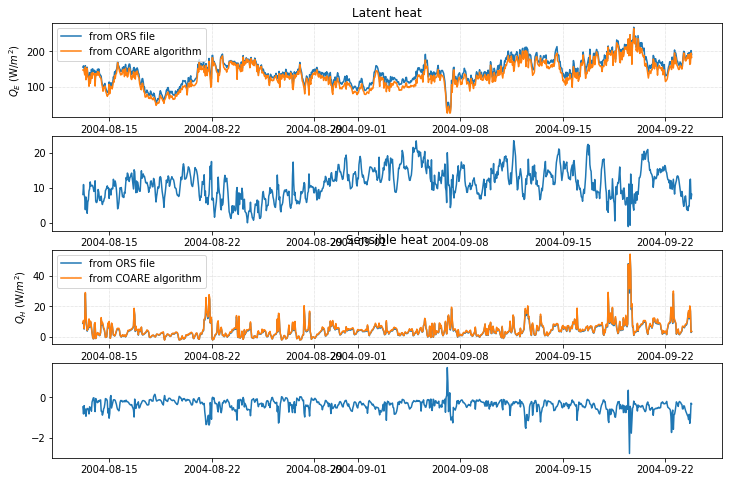

In [17]:
# Plot some comparisons
fig, ax = plt.subplots( figsize = ( 12, 8 ), nrows = 4 )

ax[0].plot(outputs['Time'],outputs['obs_Qe']*-1,label='from ORS file')
ax[0].plot(outputs['Time'],res['hlb'],label='from COARE algorithm')
ax[0].set_title('Latent heat')
ax[0].set_ylabel('$Q_{E}$ (W/$m^2$)')
ax[0].legend()
ax[0].grid(linestyle=':', linewidth=0.5)

ax[1].plot(outputs['Time'],outputs['obs_Qe']*-1 - res['hlb'], label='ORS-COARE')

ax[2].plot(outputs['Time'],outputs['obs_Qh']*-1,label='from ORS file')
ax[2].plot(outputs['Time'],res['hsb'],label='from COARE algorithm')
ax[2].set_title('Sensible heat')
ax[2].set_ylabel('$Q_{H}$ (W/$m^2$)')
ax[2].legend()
ax[2].grid(linestyle=':', linewidth=0.5)
                                                      
ax[3].plot(outputs['Time'],outputs['obs_Qh']*-1 - res['hsb'], label='ORS-COARE')